In [13]:
# suppose we run an experiment, in which the actual reward is samples from a distribution with mean 0. 
# However the number of trials is not fixed, instead we stop if, mu > .4 or n = 1000

from scipy.stats import norm,bernoulli
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

n = 5
dist = bernoulli(.2)
threshold = 0.3

In [14]:
simulations = 100000
result = np.zeros(simulations)
lastn = np.zeros(simulations)
for s in range(simulations):
    x = dist.rvs(n)
    u = np.true_divide(x.cumsum(),np.arange(1,n+1))
    exceeds = np.flatnonzero(u > threshold)
    if len(exceeds) > 0:
        result[s] = u[exceeds[0]]
    else:
        result[s] = u[-1]
        lastn[s] = 1
print result.mean()

0.36476


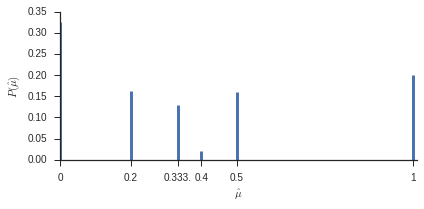

In [15]:
sns.set_style("ticks")
values,counts = np.unique(result,return_counts = True)
probs = counts/float(counts.sum())
fig,ax =plt.subplots(figsize=(6,3))
ax.vlines(values,0,probs,color=sns.color_palette()[0],linewidth=3)
ax.set_xlim(0,1.01)
ax.set_xlabel("$\hat{\mu}$")
ax.set_ylabel("$P(\hat{\mu})$")
xticks = [0,.2,.3333333,.4,.5,1]
ax.set_xticks(xticks)
ax.set_xticklabels(["0","0.2","0.333.","0.4","0.5","1"])
sns.despine()
plt.tight_layout()
fig.savefig('extreme_early_stopping.pdf', format='pdf', dpi=1200)

In [ ]:
plt.tight_layout()
fig.savefig('extreme_early)stopping.pdf', format='pdf', dpi=1200)

In [182]:
i = np.flatnonzero(lastn)
result2 = result[i]

In [183]:
result2

array([ 0.17,  0.22,  0.12, ...,  0.15,  0.16,  0.17])

In [184]:
len(result2)

371580

In [185]:
result2.mean()

0.18527754453953393

In [112]:
simulations = 100000
result = np.zeros(simulations)
for s in range(simulations):
    x = dist.rvs(n)
    result[s]=x.mean()
print result.mean()

0.2001271


In [19]:
from scipy.stats import binom
binom(5,.2).pmf(1)

0.40959999999999991

In [21]:
# Computing a posterior. 
points = 100
n = 5
posterior = np.zeros(points)
for i,p in enumerate(np.linspace(0,1,points)):
    prior = 1.0/points # independent of p in this case (uniform)
    likelyhood = binom(n,p).pmf(3)
    posterior[i] = prior*likelyhood

posterior = posterior/posterior.sum()    

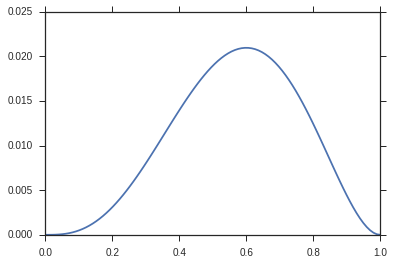

In [23]:
plt.plot(np.linspace(0,1,points),posterior)

In [ ]:
# what does the posterior look like if we assume a different data generating model?